#Importing libraries

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import pandas as pd
import PIL
import os
import pickle
from google.colab import files
import torchvision
import numpy as np
import matplotlib.pyplot as plt

#Seeding

In [ ]:
np.random.seed(26)

#Function for loading dataset

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path, images_folder, transform=torchvision.transforms.Compose([
    torchvision.transforms.Grayscale(num_output_channels=1),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(28),
    torchvision.transforms.Normalize(
        mean=[0.5],
        std=[0.5],
    ),
])):
        self.df = pd.read_csv(csv_path)
        self.images_folder = images_folder
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        record = self.df.iloc[index]
        path = self.images_folder + "/" +record[0]
        image = PIL.Image.open(path)
        label = record[3]
        if self.transform is not None:
            image = self.transform(image) 
        return image, label

#Function for converting tensor to image

In [ ]:
def tensorToImage(x):
  trans = transforms.ToPILImage()
  image = trans(x)
  return image

#Loading data

In [ ]:
path1 = '/content/drive/MyDrive/4.2/soft_com/Dataset/Assignment2/training-a.csv'
path2 = '/content/drive/MyDrive/4.2/soft_com/Dataset/Assignment2/training-a'
obj = CustomDataset(path1, path2)
dataset = [[x[0],x[1]] for x in obj]

#Visualizing data

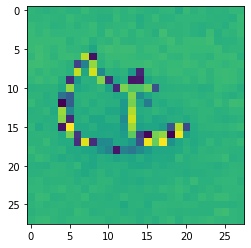

In [ ]:
plt.imshow(tensorToImage(obj[0][0]))

#Checking the length of dataset

In [ ]:
len(dataset)

19702

#Experiment 1

batch_size = 20 <br>
num_iters = 20000 <br>
input_dim = 1 * 28 * 28 <br>
num_hidden = 200 <br>
output_dim = 10 <br>
learning_rate = 0.01 <br>
Activation = ReLU <br>
Criterion = Cross Entropy <br>
Optimizar = SGD <br>
<font color = "orange"> Accurace = 22.27% <br> </font>
Comment: The accuracy is not good. <br>


In [ ]:
# Hyperparameters

batch_size = 20
num_iters = 20000
input_dim = 1*28*28 # num_features = 784
num_hidden = 200
output_dim = 10
learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle= False, batch_size=batch_size)

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()
        
        
        ### 2nd hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()
        
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        ### 2nd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)
        
        
        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        ### 3rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter_ = []
loss_ = []
accuracy_ = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 1*28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 1*28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iter_.append(iter)
            loss_.append(loss.item())
            accuracy_.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3124520778656006. Accuracy: 10.149708195889367
Iteration: 1000. Loss: 2.293536424636841. Accuracy: 9.946714031971581
Iteration: 1500. Loss: 2.2981791496276855. Accuracy: 10.149708195889367
Iteration: 2000. Loss: 2.3021318912506104. Accuracy: 9.48997716315656
Iteration: 2500. Loss: 2.3028619289398193. Accuracy: 9.616848515605176
Iteration: 3000. Loss: 2.3021059036254883. Accuracy: 9.616848515605176
Iteration: 3500. Loss: 2.303398609161377. Accuracy: 10.149708195889367
Iteration: 4000. Loss: 2.3062891960144043. Accuracy: 10.022836843440752
Iteration: 4500. Loss: 2.301593542098999. Accuracy: 9.48997716315656
Iteration: 5000. Loss: 2.3061821460723877. Accuracy: 9.48997716315656
Iteration: 5500. Loss: 2.3023037910461426. Accuracy: 9.616848515605176
Iteration: 6000. Loss: 2.2986912727355957. Accuracy: 9.946714031971581
Iteration: 6500. Loss: 2.308406114578247. Accuracy: 9.388480081197665
Iteration: 7000. Loss: 2.302349805831909. Accuracy: 11.64679015478305
Iteration: 

##Saving data

In [ ]:
def sav(x,s):
  with open(s,'wb') as f:
    pickle.dump(x,f)  
    
sav(iter_,'iter_exp1')
sav(loss_,'loss_exp1')
sav(accuracy_,'acc_exp1')
sav(model,'model_exp1')

#Function for loading data

In [ ]:
def lod(s):
  with open(s,'rb') as f:
    a = pickle.load(f)  
  return a

#Plotting loss-iteration curve for experiment 1

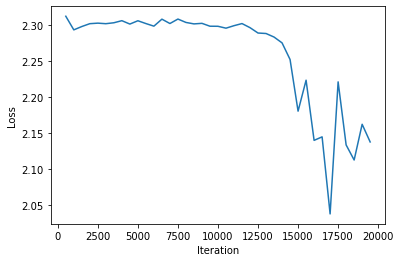

In [ ]:
iteration = lod('iter_exp1')
loss = lod('loss_exp1')

plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.plot(iteration, loss)